In [1]:
import pandas as pd
from scipy.stats import ttest_ind as ttest
import matplotlib.pyplot as plt

In [2]:
control = pd.read_excel('control.xlsx')
exp1 = pd.read_excel('day1.xlsx')
exp2 = pd.read_excel('day2.xlsx')

In [3]:
control = pd.DataFrame(control.drop('Unnamed: 0', axis=1).to_numpy().reshape(-1,1))
exp1 = pd.DataFrame(exp1.drop('Unnamed: 0', axis=1).to_numpy().reshape(-1,1))
exp2 = pd.DataFrame(exp2.drop('Unnamed: 0', axis=1).to_numpy().reshape(-1,1))

In [4]:
data = pd.concat([control, exp1, exp2], axis=1)

In [5]:
data.columns = ['control', 'exp1', 'exp2']

In [6]:
data

,control,exp1,exp2
0,6.29450,39.271000,11.07025
1,4.63275,12.260750,6.39275
2,5.60550,8.789500,6.87400
3,4.23350,6.532250,7.49725
4,4.04500,7.157500,7.19050
5,7.59275,9.641000,5.91750
6,5.77150,10.486750,5.48850
7,8.94900,8.303250,5.25250
8,4.81350,18.038750,27.43350
9,3.05875,17.183250,11.65025


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   control  32 non-null     float64
 1   exp1     32 non-null     float64
 2   exp2     32 non-null     float64
dtypes: float64(3)
memory usage: 900.0 bytes


In [8]:
data.describe()

,control,exp1,exp2
count,32.000000,32.000000,32.000000
mean,4.751812,15.617094,9.499609
std,1.415765,13.038240,5.399593
min,2.598250,4.422000,4.754000
25%,3.891062,8.545312,5.989125
50%,4.241500,10.857250,7.239000
75%,5.625062,17.321521,11.212625
max,8.949000,69.055750,27.433500


In [9]:
def perf_ttest(a, b):
    t_val, p_val = ttest(a=a, b=b, equal_var=True)
    t_val = '{0:.3f}'.format(t_val)
    p_val = '{0:.3f}'.format(p_val)
    print(f"EQUALITY OF POPULATION VARIANCE ASSUMED")
    print(f"t = {t_val}, p = {p_val}")
    print(f'EQUALITY OF POPULATION VARIANCE "NOT" ASSUMED')
    t_val, p_val = ttest(a=a, b=b, equal_var=False)
    t_val = '{0:.3f}'.format(t_val)
    p_val = '{0:.3f}'.format(p_val)
    print(f"t = {t_val}, p = {p_val}")

In [10]:
perf_ttest(data['control'], data['exp1'])

EQUALITY OF POPULATION VARIANCE ASSUMED
t = -4.687, p = 0.000
EQUALITY OF POPULATION VARIANCE "NOT" ASSUMED
t = -4.687, p = 0.000


In [11]:
perf_ttest(data['control'], data['exp2'])

EQUALITY OF POPULATION VARIANCE ASSUMED
t = -4.811, p = 0.000
EQUALITY OF POPULATION VARIANCE "NOT" ASSUMED
t = -4.811, p = 0.000


In [12]:
perf_ttest(data['exp1'], data['exp2'])

EQUALITY OF POPULATION VARIANCE ASSUMED
t = 2.452, p = 0.017
EQUALITY OF POPULATION VARIANCE "NOT" ASSUMED
t = 2.452, p = 0.019


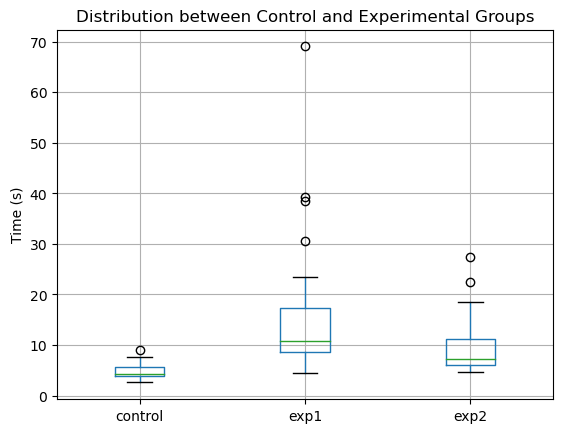

In [13]:
data.boxplot()
plt.title("Distribution between Control and Experimental Groups")
plt.ylabel("Time (s)")
# plt.xlabel("Groups")
plt.show()